In [93]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [94]:
data = pd.read_csv("../titanic.csv")

df = pd.DataFrame(data)

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [100]:
ages = ((df["age"]).dropna())

df = df.dropna(subset=['age'])
#342 Survivors, 545 Deceased

#make the ages whole numbers, add counter column
df["age"] = df["age"].round()

df["counter"] = 1

df = df.sort_values(by='age', axis=0, ascending=True)

In [105]:
bin_labels = ["0-4","5-9","10-14","15-19","20-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69","70+","70++"]

pd.cut(df['age'], bins=np.arange((min(ages)),max(ages),5)).value_counts()

(20.0, 25.0]    194
(25.0, 30.0]    168
(15.0, 20.0]    134
(30.0, 35.0]    113
(35.0, 40.0]     98
(40.0, 45.0]     69
(45.0, 50.0]     60
(0.0, 5.0]       53
(50.0, 55.0]     36
(5.0, 10.0]      30
(10.0, 15.0]     29
(55.0, 60.0]     27
(60.0, 65.0]     22
(65.0, 70.0]      5
(70.0, 75.0]      3
Name: age, dtype: int64

In [106]:
df['bin'] = pd.cut(df['age'], bins=np.arange((min(ages)-1),(max(ages)),5), labels=bin_labels)

df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,counter,bin
135,1,0,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,NaN,NaN,"New York, NY",1,70+
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",1,70+
1235,3,0,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,NaN,NaN,NaN,1,70+
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,6,NaN,"Little Onn Hall, Staffs",1,70++
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks",1,NaN


In [107]:
df['bin'] = df['bin'].replace(to_replace = [np.nan,"70++"], value ="70+")

df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,counter,bin
135,1,0,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,NaN,NaN,"New York, NY",1,70+
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",1,70+
1235,3,0,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,NaN,NaN,NaN,1,70+
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,6,NaN,"Little Onn Hall, Staffs",1,70+
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks",1,70+


In [108]:
ages = bin_labels
age_counts = []

for i in bin_labels:
    count = df.loc[df['bin'] == i]
    age_counts.append(count['counter'].count())


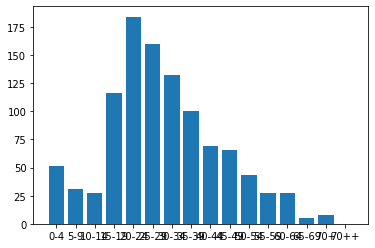

In [109]:
#bar chart of age distribution
plt.bar(ages, age_counts)
plt.show()

In [114]:
survived_counts = []

for x in bin_labels:
    select = df.loc[df['bin'] == x]
    total = select['counter'].count()
    survivors = select.loc[select["survived"] == 1]
    survivor_count = survivors["survived"].sum()
    survived_counts.append(survivor_count)


In [115]:
deceased_counts = []

for i in range(len(age_counts)):
    dead = age_counts[i] - survived_counts[i]
    deceased_counts.append(dead)


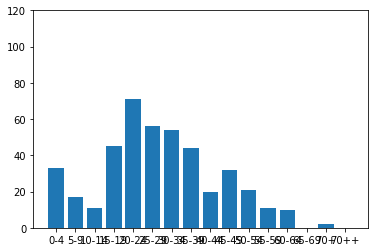

In [122]:
plt.bar(ages, survived_counts)
plt.ylim(top=120)
plt.show()

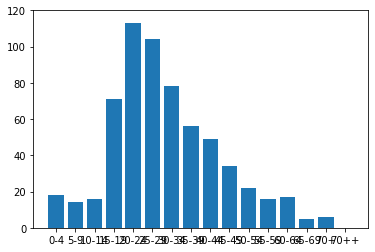

In [123]:
plt.bar(ages, deceased_counts)
plt.ylim(top=120)
plt.show()

In [124]:
percent_s = []
percent_d = []

for i in range(len(age_counts)):
    percent = (survived_counts[i]/age_counts[i])*100
    percent_s.append(round(percent))
    
for i in range(len(age_counts)):
    percent = (deceased_counts[i]/age_counts[i])*100
    percent_d.append(round(percent))


C:\Users\eg127\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in longlong_scalars
  """
C:\Users\eg127\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


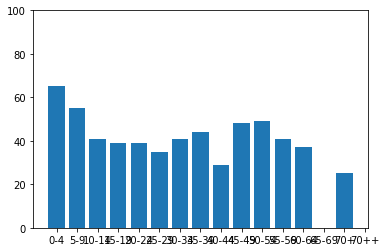

In [127]:
plt.bar(ages, percent_s)
plt.ylim(top=100)
plt.show()

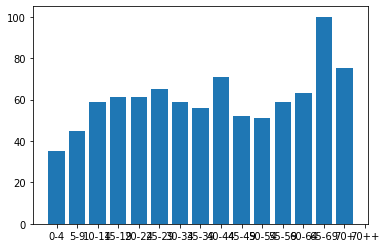

In [128]:
plt.bar(ages, percent_d)
plt.show()

In [129]:
new_data = {
    "age":ages,
    "total_onboard":age_counts,
    "survivors":survived_counts,
    "deceased":deceased_counts,
    "percent_s":percent_s,
    "percent_d":percent_d
}

In [130]:
new_df = pd.DataFrame(new_data)

new_df = new_df.dropna()

new_df.to_csv("binned_ages.csv")